# 支持向量机
- 能力：异常值检测、分类（线性/非线性）、回归（线性/非线性）
- 特性：对特征缩放比较敏感
- 场景：复杂但中小规模数据集的分类问题

通过 **Scikit-Learn**中 **SVM** 的超参数$C$（惩罚系数）来控制超平面上下界的宽窄，C越小，超平面上下界间隔越宽。

In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

## 线性SVM

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score,cohen_kappa_score,jaccard_score,hamming_loss,hinge_loss

x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=7)

svm = Pipeline([('scaler',StandardScaler()),
                ('model',LinearSVC(penalty='l2',C=1,loss='hinge',random_state=7))])
# from sklearn.svm import SVC
# SVC(kernel="linear", C=1)
# from sklearn.linear_model import SGDClassifier
# SGDClassifier(loss="hinge", alpha=1/(m*C))
svm.fit(x_train,y_train)
y_test_classes_pred = svm.predict(x_test)
y_test_scores_pred = svm.decision_function(x_test)

In [38]:
multilabel_confusion_matrix(y_test,y_test_classes_pred,labels=[0,1,2]) 

array([[[33,  0],
        [ 1, 11]],

       [[26,  3],
        [ 7,  9]],

       [[21,  7],
        [ 2, 15]]], dtype=int64)

In [39]:
accuracy_score(y_test,y_test_classes_pred)

0.7777777777777778

- Kappa=1，完全一致

In [18]:
cohen_kappa_score(y_test,y_test_classes_pred) 

0.6608892238131123

- 海明距离=0，完全一致

In [19]:
hamming_loss(y_test,y_test_classes_pred)

0.2222222222222222

- 铰链损失=0，完全一致

In [23]:
hinge_loss(y_test,y_test_scores_pred)

0.5044626757603945

- 杰卡德相似系数=1，完全一致

In [30]:
jaccard_score(y_test,
              y_test_classes_pred,
              average='macro')

0.6717836257309941

## 非线性支持向量机
在某些情况下，增加多项式特征可以将数据在高维变成线性可分的。
### 特征衍生：多项式
在数据处理时利用多项式进行特征衍生：

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score
iris = datasets.load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=7)
pipe = Pipeline([('poly_features',PolynomialFeatures(degree=3,include_bias=False)),
                 ('scaler',StandardScaler()),
                 ('model',LinearSVC(penalty='l2',C=10,loss='hinge',random_state=7))])
pipe.fit(x_train,y_train)
multilabel_confusion_matrix(y_test,pipe.predict(x_test))

array([[[33,  0],
        [ 1, 11]],

       [[26,  3],
        [ 2, 14]],

       [[26,  2],
        [ 2, 15]]], dtype=int64)

### 核：多项式
多项式特征衍生的缺陷：
- 低次数的多项式不能处理复杂的数据集
- 高次数的多项式产生了大量的特征，拖累模型运算效率

此时“核技巧”（kernel trick）便可在没有增加任何特征的前提下，取得与多项式特征衍生相同的结果。

In [7]:
from sklearn.svm import SVC
pipe = Pipeline([('scaler',StandardScaler()),
                 ('model',SVC(kernel='poly',degree=3,coef0=1,C=5))])
pipe.fit(x_train,y_train)
multilabel_confusion_matrix(y_test,pipe.predict(x_test))

array([[[33,  0],
        [ 0, 12]],

       [[27,  2],
        [ 2, 14]],

       [[26,  2],
        [ 2, 15]]], dtype=int64)

### 增加相似特征
#### 高斯 RBF 核（不太理解）
就像多项式特征法一样，相似特征法对各种机器学习算法同样也有不错的表现。但是在所有额外特征上的计算成本可能很高，特别是在大规模的训练集上。然而，“核” 技巧再一次显现了它在 SVM 上的神奇之处。

In [11]:
from sklearn.svm import SVC
pipe = Pipeline([('scaler',StandardScaler()),
                 ('model',SVC(kernel='rbf',gamma=2,C=0.1))])
pipe.fit(x_train,y_train)
multilabel_confusion_matrix(y_test,pipe.predict(x_test))

array([[[33,  0],
        [ 1, 11]],

       [[23,  6],
        [ 0, 16]],

       [[28,  0],
        [ 5, 12]]], dtype=int64)

此外，对文本文档或者 DNA 序列进行分类时，会使用例如，SSK 核（string subsequence kernel）或基于编辑距离（Levenshtein distance）核等字符串核（String kernels）。

## SVM回归
- 线性回归：LinearSVR 类实现，训练数据需被中心化和标准化
- 非线性回归：核化的 SVM 模型

5.638821191494652


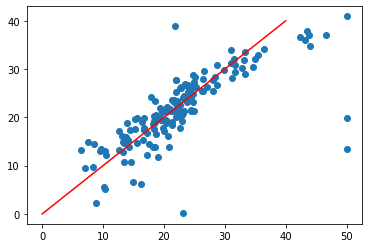

In [27]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

X,y = load_boston(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

svm_reg = Pipeline([('scaler',StandardScaler()),
                    ('reg',LinearSVR(epsilon=1.5))])
svm_reg.fit(x_train,y_train)
y_test_pred = svm_reg.predict(x_test)

print(mean_squared_error(y_test,y_test_pred,squared=False))

fig,ax = plt.subplots()
ax.plot([0,40],[0,40],'r-')
plt.scatter(y_test,y_test_pred)

10.462248520300742


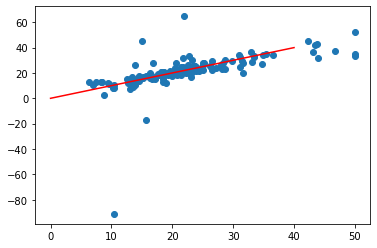

In [28]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X,y = load_boston(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

svm_poly_reg = Pipeline([('scaler',StandardScaler()),
                         ('reg',SVR(kernel="poly",degree=3,C=100,epsilon=0.1))])
svm_poly_reg.fit(x_train,y_train)
y_test_pred = svm_poly_reg.predict(x_test)

print(mean_squared_error(y_test,y_test_pred,squared=False))

fig,ax = plt.subplots()
ax.plot([0,40],[0,40],'r-')
plt.scatter(y_test,y_test_pred)

## SVM 异常检测

# 决策树
决策树的众多特性之一就是， 它不需要太多的数据预处理， 尤其是不需要进行特征的缩放或者归一化。

Scikit-Learn 用的是 CART 算法， CART 算法仅产生二叉树：每一个非叶节点总是只有两个子节点（只有是或否两个结果）。然而，像 ID3 这样的算法可以产生超过两个子节点的决策树模型。

Scikit-Learn 用分裂回归树（Classification And Regression Tree，简称 CART）算法训练决策树（也叫“增长树”）。这种算法思想真的非常简单：

首先使用单个特征k和阈值 t_k（例如，“花瓣长度≤2.45cm”）将训练集分成两个子集。它如何选择k和 t_k 呢？它寻找到能够产生最纯粹的子集一对 (k, t_k)，然后通过子集大小加权计算。
当它成功的将训练集分成两部分之后， 它将会继续使用相同的递归式逻辑继续的分割子集，然后是子集的子集。当达到预定的最大深度之后将会停止分裂（由max_depth超参数决定），或者是它找不到可以继续降低不纯度的分裂方法的时候。几个其他超参数（之后介绍）控制了其他的停止生长条件（min_samples_split，min_samples_leaf，min_weight_fraction_leaf，max_leaf_nodes）。
正如您所看到的，CART 算法是一种贪婪算法：它贪婪地搜索最高级别的最佳分割方式，然后在每个深度重复该过程。 它不检查分割是否能够在几个级别中的全部分割可能中找到最佳方法。贪婪算法通常会产生一个相当好的解决方法，但它不保证这是全局中的最佳解决方案。
基尼不纯度或是信息熵，熵的减少通常称为信息增益。
那么我们到底应该使用 Gini 指数还是熵呢？ 事实上大部分情况都没有多大的差别：他们会生成类似的决策树。

基尼指数计算稍微快一点，所以这是一个很好的默认值。但是，也有的时候它们会产生不同的树，基尼指数会趋于在树的分支中将最多的类隔离出来，而熵指数趋向于产生略微平衡一些的决策树模型。

决策树几乎不对训练数据做任何假设（于此相反的是线性回归等模型，这类模型通常会假设数据是符合线性关系的）。

如果不添加约束，树结构模型通常将根据训练数据调整自己，使自身能够很好的拟合数据，而这种情况下大多数会导致模型过拟合。

这一类的模型通常会被称为非参数模型，这不是因为它没有任何参数（通常也有很多），而是因为在训练之前没有确定参数的具体数量，所以模型结构可以根据数据的特性自由生长。

于此相反的是，像线性回归这样的参数模型有事先设定好的参数数量，所以自由度是受限的，这就减少了过拟合的风险（但是增加了欠拟合的风险）。

### 分类
### 回归

它很容易理解和解释，易于使用且功能丰富而强大。然而，它也有一些限制，首先，你可能已经注意到了，决策树很喜欢设定正交化的决策边界，（所有边界都是和某一个轴相垂直的），这使得它对训练数据集的旋转很敏感，例如图 6-7 显示了一个简单的线性可分数据集。在左图中，决策树可以轻易的将数据分隔开，但是在右图中，当我们把数据旋转了 45° 之后，决策树的边界看起来变的格外复杂。尽管两个决策树都完美的拟合了训练数据，右边模型的泛化能力很可能非常差。

解决这个难题的一种方式是使用 PCA 主成分分析（第八章），这样通常能使训练结果变得更好一些。

更加通俗的讲，决策时的主要问题是它对训练数据的微小变化非常敏感，举例来说，我们仅仅从鸢尾花训练数据中将最宽的 Iris-Versicolor 拿掉（花瓣长 4.8 厘米，宽 1.8 厘米），然后重新训练决策树模型，你可能就会得到图 6-8 中的模型。正如我们看到的那样，决策树有了非常大的变化（原来的如图 6-2），事实上，由于 Scikit-Learn 的训练算法是非常随机的，即使是相同的训练数据你也可能得到差别很大的模型（除非你设置了随机数种子）。


# 集成学习
假设你去随机问很多人一个很复杂的问题，然后把它们的答案合并起来。通常情况下你会发现这个合并的答案比一个专家的答案要好。这就叫做群体智慧。同样的，如果你合并了一组分类器的预测（像分类或者回归），你也会得到一个比单一分类器更好的预测结果。这一组分类器就叫做集成；因此，这个技术就叫做集成学习，一个集成学习算法就叫做集成方法。
## 投票机制
一个非常简单去创建一个更好的分类器的方法就是去整合每一个分类器的预测然后经过投票去预测分类。这种分类器就叫做硬投票分类器

如果所有的分类器都能够预测类别的概率（例如他们有一个predict_proba()方法），那么你就可以让 sklearn 以最高的类概率来预测这个类，平均在所有的分类器上。-这种方式叫做软投票。

即使每一个分类器都是一个弱学习器（意味着它们也就比瞎猜好点），集成后仍然是一个强学习器（高准确率），只要有足够数量的弱学习者，他们就足够多样化。

这怎么可能？接下来的分析将帮助你解决这个疑问。假设你有一个有偏差的硬币，他有 51% 的几率为正面，49% 的几率为背面。如果你实验 1000 次，你会得到差不多 510 次正面，490 次背面，因此大多数都是正面。如果你用数学计算，你会发现在实验 1000 次后，正面概率为 51% 的人比例为 75%。你实验的次数越多，正面的比例越大（例如你试验了 10000 次，总体比例可能性就会达到 97%）。这是因为大数定律 ：当你一直用硬币实验时，正面的比例会越来越接近 51%。图 7-3 展示了始终有偏差的硬币实验。你可以看到当实验次数上升时，正面的概率接近于 51%。最终所有 10 种实验都会收敛到 51%，它们都大于 50%。

同样的，假设你创建了一个包含 1000 个分类器的集成模型，其中每个分类器的正确率只有 51%（仅比瞎猜好一点点）。如果你用投票去预测类别，你可能得到 75% 的准确率！然而，这仅仅在所有的分类器都独立运行的很好、不会发生有相关性的错误的情况下才会这样，然而每一个分类器都在同一个数据集上训练，导致其很可能会发生这样的错误。他们可能会犯同一种错误，所以也会有很多票投给了错误类别导致集成的准确率下降。

如果使每一个分类器都独立自主的分类，那么集成模型会工作的很好。去得到多样的分类器的方法之一就是用完全不同的算法，这会使它们会做出不同种类的错误，这会提高集成的正确率

## bagging
Bagging 和 Pasting 都允许在多个分类器上对训练集进行多次采样，但只有 Bagging 允许对同一种分类器上对训练集进行进行多次采样。

有放回采样被称为装袋（Bagging，是 bootstrap aggregating 的缩写）。无放回采样称为粘贴（pasting）。


当所有的分类器被训练后，集成可以通过对所有分类器结果的简单聚合来对新的实例进行预测。聚合函数通常对分类是统计模式（例如硬投票分类器）或者对回归是平均。每一个单独的分类器在如果在原始训练集上都是高偏差，但是聚合降低了偏差和方差。通常情况下，集成的结果是有一个相似的偏差，但是对比与在原始训练集上的单一分类器来讲有更小的方差。

对于 Bagging 来说，一些实例可能被一些分类器重复采样，但其他的有可能不会被采样。没有被采样的训练实例就叫做 Out-of-Bag 实例。因为在训练中分类器从来没有看到过 oob 实例，所以它可以在这些实例上进行评估，而不需要单独的验证集或交叉验证。你可以拿出每一个分类器的 oob 来评估集成本身。

BaggingClassifier也支持采样特征。它被两个超参数max_features和bootstrap_features控制。他们的工作方式和max_samples和bootstrap一样，但这是对于特征采样而不是实例采样。因此，每一个分类器都会被在随机的输入特征内进行训练。

当你在处理高维度输入下（例如图片）此方法尤其有效。对训练实例和特征的采样被叫做随机贴片。保留了所有的训练实例（例如bootstrap=False和max_samples=1.0），但是对特征采样（bootstrap_features=True并且/或者max_features小于 1.0）叫做随机子空间。

采样特征导致更多的预测多样性，用高偏差换低方差。
### 随机森林
随机森林是通过 bagging/pasting 方法进行训练的树集成模型。
- BaggingClassifier实现：
- randomforestclassifier实现：
#### 极端随机树
随机森林上生长树时，在每个结点分裂时只考虑随机特征集上的特征。相比于找到更好的特征我们可以通过使用对特征使用随机阈值使树更加随机。
- ExtraTreesClassifier
#### 特征重要度
最后，如果你观察一个单一决策树，重要的特征会出现在更靠近根部的位置，而不重要的特征会经常出现在靠近叶子的位置。因此我们可以通过计算一个特征在森林的全部树中出现的平均深度来预测特征的重要性。


## boosting
提升（Boosting，最初称为假设增强）指的是可以将几个弱学习者组合成强学习者的集成方法。大多数提升方法的思想就是按顺序去训练分类器，每一个都要尝试修正前面的分类。最著名的就是 Adaboost（适应性提升，是 Adaptive Boosting 的简称） 和 Gradient Boosting（梯度提升）。
### Adaboost
1. 训练一个基分类器并在训练集上做预测
2. 权重更新，增加误分类训练实例的权重
3. 基于更新后的权重再次训练一个基分类器
4. 重复上述步骤直到满足终止条件
### 梯度提升
1. 训练一个基分类器并在训练集上做预测
2. 计算真实值与预测值的残差
3. 基于步骤2的残差再次训练一个基分类器
4. 重复上述步骤直到满足终止条件
## stacking

Stacking（stacked generalization 的缩写）这个算法基于一个简单的想法：不使用琐碎的函数（如硬投票）来聚合集合中所有分类器的预测，我们为什么不训练一个模型来执行这个聚合？图 7-12 展示了这样一个在新的回归实例上预测的集成。底部三个分类器每一个都有不同的值（3.1，2.7 和 2.9），然后最后一个分类器（叫做 blender 或者 meta learner ）把这三个分类器的结果当做输入然后做出最终决策（3.0）。


接下来，第一层的分类器被用来预测第二个子集（保持集）（详见 7-14）。这确保了预测结果很“干净”，因为这些分类器在训练的时候没有使用过这些事例。现在对在保持集中的每一个实例都有三个预测值。我们现在可以使用这些预测结果作为输入特征来创建一个新的训练集（这使得这个训练集是三维的），并且保持目标数值不变。随后 blender 在这个新的训练集上训练，因此，它学会了预测第一层预测的目标值。

